In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir(os.curdir))
from sklearn import preprocessing
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier


['bulk_test.json', 'data_values.csv', 'data_values_good.csv', 'deep_learning_1.ipynb', 'dtree_dl.ipynb', 'KNN_dl.ipynb', 'labels.csv', 'labels_good.csv', 'putLabels.py', 'xgbmodel.pkl', 'XGBoost_dl.ipynb', 'XGBoost_dl_sentiment.ipynb']


In [2]:
labels = pd.read_csv("labels_good.csv")
labels = labels.set_index('rider_provider')
labels['aggregate'] = labels[['wce_label','eps_label','de_label','pe_label','roe_label','growth_rate_label','profitm_label','grossm_label','ro40_label','churnrate_label','EVbyEbidta_label','marketCap_label','magicNum_label']].sum(axis = 1, skipna = True)


In [3]:
avg_labels = labels.mean(axis = 0, skipna = True).fillna(0).to_dict()
for key in labels.keys():
  labels[key] = labels[key].fillna(avg_labels[key])


In [4]:
# removed all Nan above

In [5]:

# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [6]:
labels['aggregate'] = labels['aggregate'].astype(int)
X = labels[['GrossProfit','GrossMargin','WorkingCapitalRatio','EarningPerShare','DebtToEquityRatio','PEratio','ReturnOfEquity','EBIDTAratio','EvRatio','EVbyEbidta','ChurnRate','GrowthRate','ProfitMargin','RuleOf40','MarketCap','MagicNumber']]
y = labels['aggregate']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [8]:
np.unique(labels['aggregate'].to_numpy())

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [9]:
np.unique(y_train.to_numpy())
classes = 2

In [10]:
def label_enc(narr):
  xarr = np.zeros(narr.shape)
  for i in range(len(narr)):
    if narr[i] >= 1:
      xarr[i] = 1
  return xarr.astype(int)

In [11]:
d_train = label_enc(y_train.to_numpy())
d_test = label_enc(y_test.to_numpy())


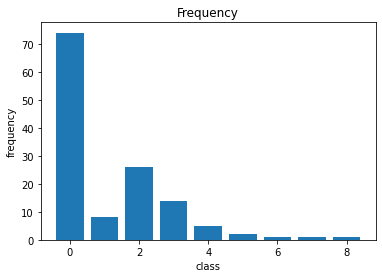

In [12]:
count = {}
for x,y in zip(X_train.to_numpy(), y_train.to_numpy()):
  if y not in count:
    count[y] = 0
  count[y] += 1

x = list(count.keys())
y = list(count.values())

plt.bar(x, y)                # plot the points in the array a
plt.title("Frequency")  # Add a title to the figure
plt.xlabel("class")    # Give a label to the x-axis
plt.ylabel("frequency");    # Give a label to the y-axis

In [13]:
xgb_classifier = XGBClassifier(max_depth=5, n_estimators=1000)
xgb_classifier.fit(X_train, d_train)  
xgb_predictions = xgb_classifier.predict(X_test)

# creating a confusion matrix
cm = confusion_matrix(d_test, xgb_predictions)

C:\Users\krishanu\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:42:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [14]:
cm

array([[73,  2],
       [ 4, 53]], dtype=int64)

In [15]:
import seaborn as sn
rang = "ABCDEFGHIJKLMNOP"[:cm.shape[0]]
print(classes)
df_cm = pd.DataFrame(cm, index = [i for i in rang],
                  columns = [i for i in rang])

2


<AxesSubplot:>

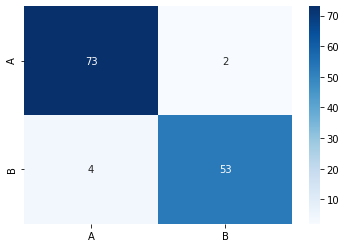

In [16]:
sn.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
print(accuracy_score(d_test, xgb_predictions))

0.9545454545454546


In [19]:
def label_enc(narr):
  xarr = np.zeros(narr.shape)
  for i in range(len(narr)):
    if narr[i] >= 5:
      xarr[i] = 1
  return xarr.astype(int)

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score
sentiment = d_test
outcome = xgb_predictions

In [21]:
acc = accuracy_score(sentiment, outcome)
prec = precision_score(sentiment, outcome)
rec = recall_score(sentiment, outcome)
f1 = f1_score(sentiment, outcome)
print(f"accuracy: {acc}")
print(f"precision_score: {prec}")
print(f"recall_score: {rec}")
print(f"f1_score: {f1}")

accuracy: 0.9545454545454546
precision_score: 0.9636363636363636
recall_score: 0.9298245614035088
f1_score: 0.9464285714285715


In [22]:
'''
  precision = TP / (TP + FP)
  Lot of false positives
'''
'''
  recall_score = TP / (TP + FN)
  Lot of wrong result
'''

'\n  recall_score = TP / (TP + FN)\n  Lot of wrong result\n'

In [23]:
import pickle
with open('xgbmodel.pkl', 'wb') as fid:
    pickle.dump(xgb_classifier,fid,2) 